In [21]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
# §4.1 留出驗證 (p.78) -- 應該無法執行 --

num_validation_samples = 10000

np.random.shuffle(data)

validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

training_data = data[:]

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# 可調節模型、重新訓練、評估，然後再次調節…
model = get_model()
model.train(np.concatenate([training_data, validation_data]))

test_score = model.evaluate(test_data)


NameError: name 'data' is not defined

In [29]:
tf.__version__

'2.4.1'

In [ ]:
# §4.2 K折交叉驗證 (p.79) -- 應該無法執行 --



In [30]:
# §代碼清單 3-1
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [31]:
# §代碼清單 3-2
import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [34]:
# §4.3 原始模型 (method 1)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


2023-09-13 16:01:31.126057: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-09-13 16:01:31.203365: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-13 16:01:31.203958: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-13 16:01:31.205431: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VMDebianVIVO): /proc/driver/nvidia/version does not exist
2023-09-13 16:01:31.218601: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild Tens

In [35]:
# §4.3 原始模型  (method 1)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

2023-09-13 16:01:38.528172: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 600000000 exceeds 10% of free system memory.
2023-09-13 16:01:40.395017: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-09-13 16:01:40.426360: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1992000000 Hz


Epoch 1/20
27/30 [==========================>...] - ETA: 0s - loss: 0.5719 - accuracy: 0.7163

2023-09-13 16:01:43.038790: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 4s 127ms/step - loss: 0.5613 - accuracy: 0.7271 - val_loss: 0.3898 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3263 - accuracy: 0.9027 - val_loss: 0.3187 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2455 - accuracy: 0.9266 - val_loss: 0.2961 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2029 - accuracy: 0.9386 - val_loss: 0.2777 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1677 - accuracy: 0.9532 - val_loss: 0.2779 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1433 - accuracy: 0.9579 - val_loss: 0.2755 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1264 - accuracy: 0.9644 - val_loss: 0.2896 - val_accuracy: 0.8830
Epoch 8/20
30/30 [=====

/tmp/ipykernel_16742/385232448.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
/tmp/ipykernel_16742/385232448.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


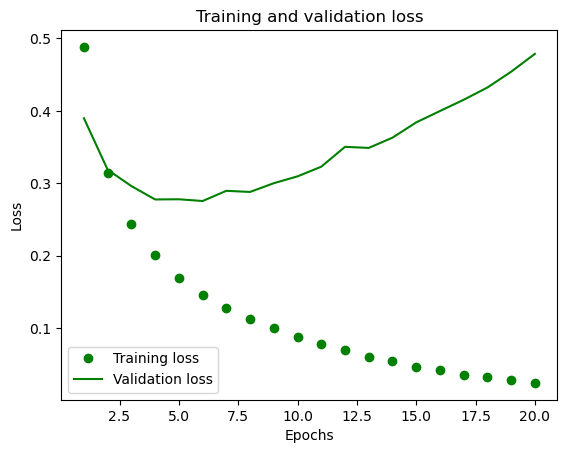

In [36]:
# §4.3 原始模型  (method 1)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [37]:
# §4.4 容量更小的模型 (method 2)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [38]:
# §4.4 容量更小的模型 (method 2)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# §代碼清單 3-8 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

2023-09-13 16:02:21.716866: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
29/30 [============================>.] - ETA: 0s - loss: 0.6324 - accuracy: 0.6921

2023-09-13 16:02:26.356871: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 3s 51ms/step - loss: 0.6290 - accuracy: 0.6977 - val_loss: 0.5024 - val_accuracy: 0.8272
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4552 - accuracy: 0.8715 - val_loss: 0.4083 - val_accuracy: 0.8671
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3594 - accuracy: 0.9009 - val_loss: 0.3519 - val_accuracy: 0.8791
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2966 - accuracy: 0.9146 - val_loss: 0.3209 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2535 - accuracy: 0.9234 - val_loss: 0.2946 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2129 - accuracy: 0.9369 - val_loss: 0.2941 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1872 - accuracy: 0.9430 - val_loss: 0.2779 - val_accuracy: 0.8918
Epoch 8/20
30/30 [======

/tmp/ipykernel_16742/619948473.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
/tmp/ipykernel_16742/619948473.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


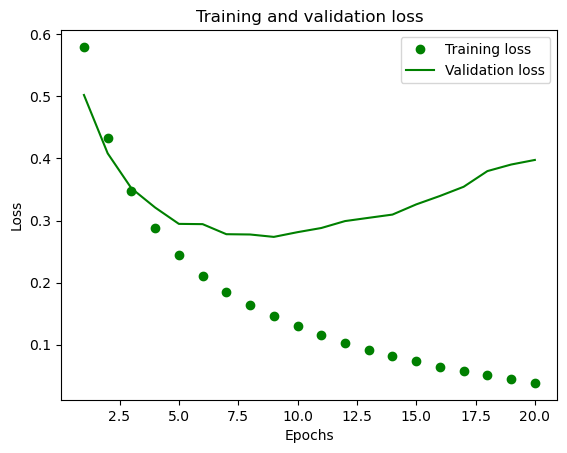

In [39]:
# §4.4 容量更小的模型 (method 2)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [40]:
# §4.4 容量更大的模型 (method 3)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [41]:
# §4.4 容量更大的模型 (method 3)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


2023-09-13 16:02:43.840334: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
30/30 [==============================] - 9s 303ms/step - loss: 0.6893 - accuracy: 0.6675 - val_loss: 0.3082 - val_accuracy: 0.8851
Epoch 2/20
30/30 [==============================] - 9s 287ms/step - loss: 0.2369 - accuracy: 0.9127 - val_loss: 0.2979 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 8s 276ms/step - loss: 0.1484 - accuracy: 0.9463 - val_loss: 0.3476 - val_accuracy: 0.8736
Epoch 4/20
30/30 [==============================] - 8s 279ms/step - loss: 0.0706 - accuracy: 0.9749 - val_loss: 0.3902 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 8s 278ms/step - loss: 0.0476 - accuracy: 0.9905 - val_loss: 0.3359 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 8s 279ms/step - loss: 0.0064 - accuracy: 0.9999 - val_loss: 0.5098 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 8s 278ms/step - loss: 6.5482e-04 - accuracy: 1.0000 - val_loss: 0.6262 - val_accuracy: 0.8852
Ep

/tmp/ipykernel_16742/870724659.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
/tmp/ipykernel_16742/870724659.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


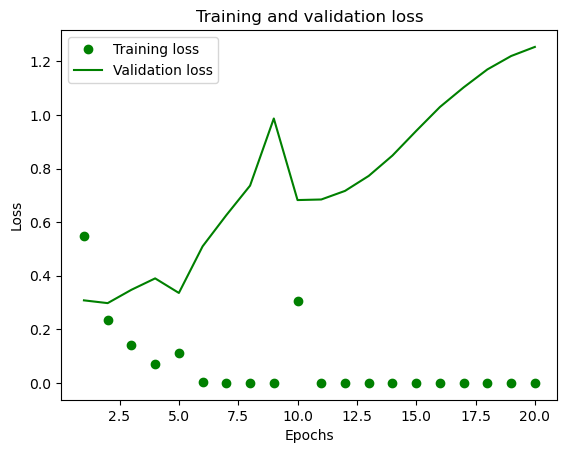

In [42]:
# §4.4 容量更大的模型 (method 3)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
# §4.6 向模型添加L2權重正則化

from keras import regularizers

model = models.Sequential()

# §4.7 Keras中不同的權重正則化項
# kernel_regularizer=regularizers.l2(0.01)
# kernel_regularizer=regularizers.l1(00.01)
# kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [44]:
# §代碼清單 3-8 (§4.6 L2)
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 91ms/step - loss: 0.8015 - accuracy: 0.6493 - val_loss: 0.6330 - val_accuracy: 0.7836
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5459 - accuracy: 0.8876 - val_loss: 0.4983 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4415 - accuracy: 0.9142 - val_loss: 0.4546 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3808 - accuracy: 0.9279 - val_loss: 0.4411 - val_accuracy: 0.8808
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3444 - accuracy: 0.9347 - val_loss: 0.4221 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3182 - accuracy: 0.9422 - val_loss: 0.4304 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3005 - accuracy: 0.9481 - val_loss: 0.4135 - val_accuracy: 0.8829
Epoch 8/20
30

/tmp/ipykernel_16742/2345061308.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
/tmp/ipykernel_16742/2345061308.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')


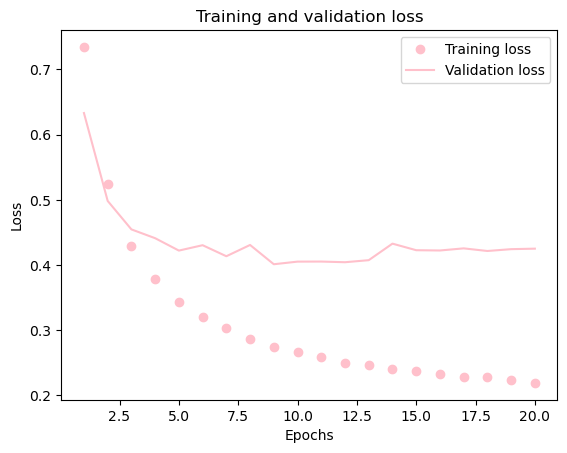

In [45]:
# §代碼清單 3-9 (§4.6 L2)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [46]:
# §代碼清單 4-8 向IMDB網路中添加dropout

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
# §代碼清單 4-8 向IMDB網路中添加dropout -- CONTINUE 01 --
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


C:\Users\linea\AppData\Local\Temp\ipykernel_3212\2134820698.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
C:\Users\linea\AppData\Local\Temp\ipykernel_3212\2134820698.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')


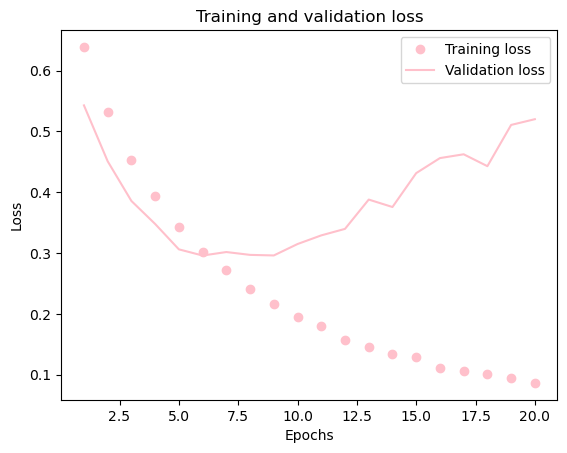

In [13]:
# §代碼清單 4-8 向IMDB網路中添加dropout -- CONTINUE 02 --
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
